In [46]:
!pip install statsmodels 


In [63]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams


from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error


In [64]:
import seaborn as sns


In [65]:
#read the data set 

df= pd.read_csv('bank_traffic_data.csv')



In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10013 non-null  object
 1   count      10013 non-null  int64 
 2   window     10013 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.8+ KB


In [67]:
#check the duplicated values 
df.duplicated().sum()

0

In [68]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [69]:
df.head()

,timestamp,count,window
0,2019-09-26 02:00:00+02:00,764,1
1,2019-09-27 02:00:00+02:00,0,1
2,2019-09-28 02:00:00+02:00,0,1
3,2019-09-29 02:00:00+02:00,1973,1
4,2019-09-30 02:00:00+02:00,1908,1


In [70]:
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year

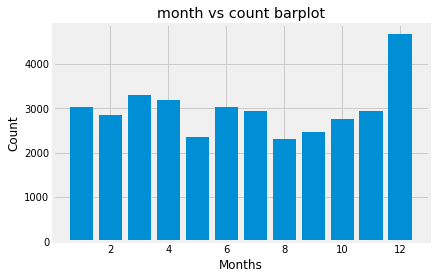

In [71]:
plt.bar(df['month'],df['count'])
plt.title("month vs count barplot")
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

> from the above bar plot it show that december has the heighst traffic 

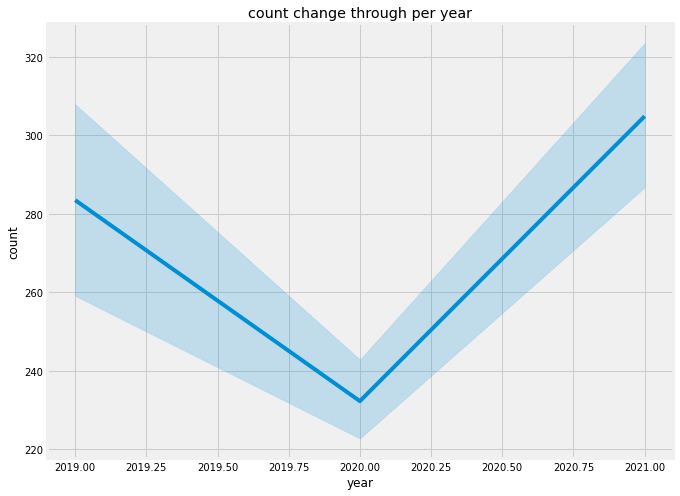

In [72]:
plt.figure(figsize=(10,8))
plt.title('count change through per year')
sns.lineplot(x="year" ,y ="count" ,data =df ) ;

> the previous lineplot show that the tcraffic on banks tellers decresed during the lock down and the begging of the pandamic

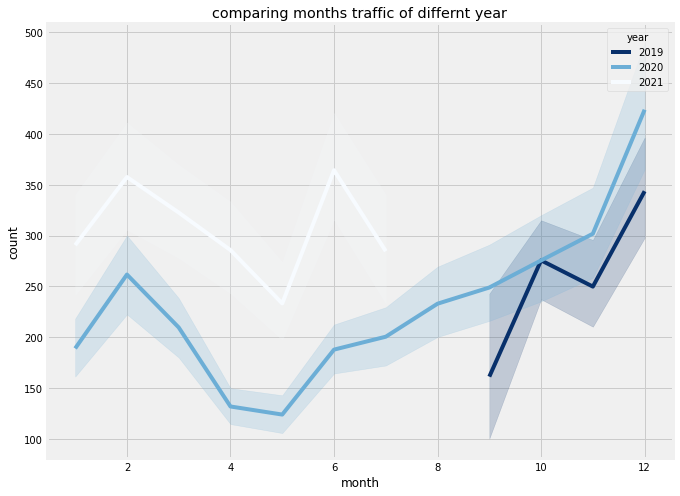

In [73]:
plt.figure(figsize=(10,8))
plt.title('comparing months traffic of differnt year')
sns.lineplot(df['month'],df['count'],hue =df['year'],palette='Blues_r') ;


what is the year of the month with highest traffic ? 
let's find out 

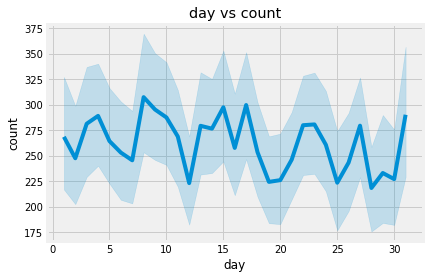

In [74]:
plt.title('day vs count')
sns.lineplot(x='day',y='count',data=df)
plt.show()

In [75]:
plt.figure(figsize=(10,8))
c =df[['count','day']].groupby('day').mean()
c['count'].nlargest(3)



day
8     307.486239
17    299.785933
15    297.565749
Name: count, dtype: float64

<Figure size 720x576 with 0 Axes>

what is the window with highest traffic ? 

<AxesSubplot:title={'center':'window and count '}, xlabel='window', ylabel='count'>

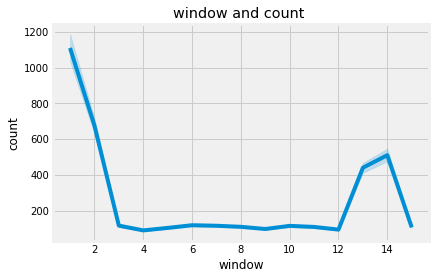

In [76]:
plt.title('window and count ')
sns.lineplot(x='window',y='count',data=df)

In [77]:

w = df[['count','window']].groupby('window').mean()
w['count'].nlargest(3)



window
1     1109.844444
2      675.528889
14     509.795556
Name: count, dtype: float64

the window with highst traffic is tellet number 1

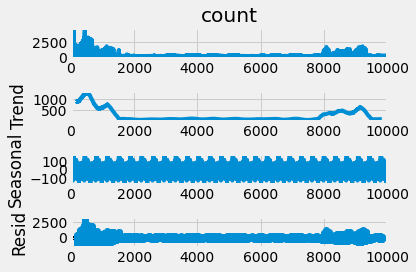

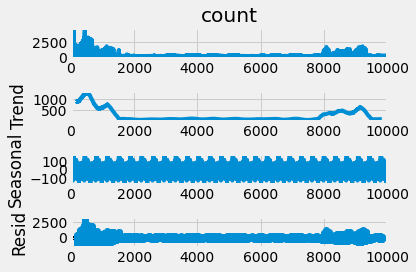

In [90]:
plt.style.use('fivethirtyeight') 

decomposed_ = sm.tsa.seasonal_decompose(df['count'],period=360) # The frequncy is annual

decomposed_.plot()
